In [1]:
import torch
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torchvision


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!cp -r '/content/drive/MyDrive/rotation_classification' '/content'

In [4]:
import os
try:
  os.mkdir('/content/train')
  os.mkdir('/content/val')
  os.mkdir('/content/test')
except OSError as error:
  print(error)

In [5]:
!cp '/content/rotation_classification/train (2).zip' '/content/train/train.zip'
!unzip '/content/train/train.zip' -d '/content/train'
!rm -f '/content/train/train.zip'

Streaming output truncated to the last 5000 lines.
  inflating: /content/train/5499.jpg  
  inflating: /content/train/55.jpg   
  inflating: /content/train/550.jpg  
  inflating: /content/train/5500.jpg  
  inflating: /content/train/5501.jpg  
  inflating: /content/train/5502.jpg  
  inflating: /content/train/5503.jpg  
  inflating: /content/train/5504.jpg  
  inflating: /content/train/5505.jpg  
  inflating: /content/train/5506.jpg  
  inflating: /content/train/5507.jpg  
  inflating: /content/train/5508.jpg  
  inflating: /content/train/5509.jpg  
  inflating: /content/train/551.jpg  
  inflating: /content/train/5510.jpg  
  inflating: /content/train/5511.jpg  
  inflating: /content/train/5512.jpg  
  inflating: /content/train/5513.jpg  
  inflating: /content/train/5514.jpg  
  inflating: /content/train/5515.jpg  
  inflating: /content/train/5516.jpg  
  inflating: /content/train/5517.jpg  
  inflating: /content/train/5518.jpg  
  inflating: /content/train/5519.jpg  
  inflating: /co

In [ ]:
!cp '/content/rotation_classification/val (2).zip' '/content/val/val.zip'
!unzip '/content/val/val.zip' -d '/content/val'
!rm -f '/content/val/val.zip'

In [7]:
!cp '/content/rotation_classification/val.csv' '/content/val.csv'
!cp '/content/rotation_classification/train (1).csv' '/content/train.csv'

In [2]:
# from sklearn.preprocessing import OneHotEncoder
# classes = np.asarray([i for i in range(1,361)])
# enc = OneHotEncoder(sparse=False)
# enc.fit(classes.reshape(len(classes),1))

In [3]:
# enc.categories_[0:5]

In [4]:
# temp_dat = enc.transform([[360]])
# print(temp_dat)
# print(np.argmax(temp_dat)+1)

In [5]:
# temp_dat = enc.transform([[1]])
# print(temp_dat)
# print(np.argmax(temp_dat)+1)

In [8]:
train_csv = pd.read_csv('/content/train.csv')
dummy = train_csv.values
print(dummy[0:5])
dummy1 = dummy[:,1]
train_data = dummy1
print(train_data[0:5])

[[  0 141]
 [  1  53]
 [  2  45]
 [  3  48]
 [  4  14]]
[141  53  45  48  14]


In [7]:
# print(train_data[0])
# print(np.argmax(train_data[0])+1)

In [9]:
val_csv = pd.read_csv('/content/val.csv')
vals = val_csv.values
vals1 = vals[:,1]
val_data = vals1
print(val_data[0:5])

[141  53  45  48  14]


In [10]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [11]:
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils
import cv2
from PIL import Image 


class rotationclass(Dataset):

  def __init__(self,csv_data,root_dir,transform=None):
    self.root_dir = root_dir
    self.transform = transform
    self.data = csv_data

  def __len__(self):
    return len(self.data)

  def __getitem__(self,idx):
    img_path = self.root_dir +'/'+ str(idx) + '.jpg'
    image = Image.open(img_path)
    label = int(self.data[idx])
    
    if self.transform:
      tensor_image = self.transform(image)

    return tensor_image,label



In [12]:
import torchvision.models as models
resnet18 = models.resnet18()
resnet18

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [14]:
resnet18.fc = torch.nn.Linear(512,360)
resnet18

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [15]:
resnet18 = resnet18.to(device)

batch_size = 32
train_set = rotationclass(train_data,'/content/train',transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize(mean=[0.485, 0.456, 0.406],std=[0.229, 0.224, 0.225])
                                                              ]))
train_loader = torch.utils.data.DataLoader(train_set,batch_size=batch_size,shuffle=True)

val_set = rotationclass(val_data,'/content/val',transforms.Compose([
          transforms.ToTensor(),
          transforms.Normalize(mean=[0.485, 0.456, 0.406],std=[0.229, 0.224, 0.225]),
                                                                 ]))
val_loader = torch.utils.data.DataLoader(val_set,batch_size=batch_size,shuffle=False)

In [16]:
def evaluation(dataloader):
  total,correct = 0,0
  for data in dataloader:
    inputs,labels = data
    inputs,labels = inputs.to(device),labels.to(device)
    outputs = resnet18(inputs)
    _,pred = torch.max(outputs.data,1) 
    pred = pred + 1
    total += labels.size(0)
    correct += (pred==labels).sum().item()
  
  return 100*correct/total

In [17]:
import torch.optim as optim
import torch.nn as nn
loss_fn = nn.CrossEntropyLoss()
opt = optim.Adam(resnet18.parameters())




  0%|          | 0/10 [00:00<?, ?it/s]

Epoch = 0/10, Val Acc: 95.28, Train Acc: 95.38 





 10%|█         | 1/10 [11:11<1:40:45, 671.77s/it]

Epoch = 1/10, Val Acc: 96.90, Train Acc: 96.98 





 20%|██        | 2/10 [22:26<1:29:41, 672.73s/it]

Epoch = 2/10, Val Acc: 97.83, Train Acc: 97.49 





 30%|███       | 3/10 [33:41<1:18:32, 673.24s/it]

Epoch = 3/10, Val Acc: 97.90, Train Acc: 97.77 





 40%|████      | 4/10 [44:57<1:07:25, 674.30s/it]

Epoch = 4/10, Val Acc: 99.30, Train Acc: 99.02 





 50%|█████     | 5/10 [56:11<56:10, 674.18s/it]  

Epoch = 5/10, Val Acc: 92.90, Train Acc: 93.45 





 60%|██████    | 6/10 [1:07:25<44:56, 674.11s/it]

Epoch = 6/10, Val Acc: 99.17, Train Acc: 99.28 





 70%|███████   | 7/10 [1:18:38<33:40, 673.61s/it]

Epoch = 7/10, Val Acc: 97.85, Train Acc: 97.76 





 80%|████████  | 8/10 [1:29:51<22:27, 673.53s/it]

Epoch = 8/10, Val Acc: 97.75, Train Acc: 97.72 





 90%|█████████ | 9/10 [1:41:06<11:14, 674.04s/it]

Epoch = 9/10, Val Acc: 98.83, Train Acc: 99.03 





100%|██████████| 10/10 [1:52:20<00:00, 674.02s/it]


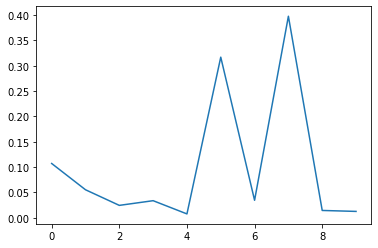

In [31]:
from tqdm import tqdm
loss_arr = []
loss_epoch_arr = []
max_epochs = 10

for epoch in tqdm(range(max_epochs)):
  for i, data in enumerate(train_loader,0):
    inputs, labels = data
    inputs,labels = inputs.to(device),labels.to(device)
    opt.zero_grad()

    outputs = resnet18(inputs)
    #print(outputs.shape)
    #_,pred_labels = torch.max(outputs.data,1)
    #pred_labels = pred_labels + 1
    #print(pred_labels)
    #print(labels)
    loss = loss_fn(outputs,labels-1)
    loss.backward()
    opt.step()

    loss_arr.append(loss.item())

  PATH = '/content/' + 'model_' + str(epoch) + '.pt'
  
  
  loss_epoch_arr.append(loss.item())

  print('Epoch = %d/%d, Val Acc: %0.2f, Train Acc: %0.2f '%(epoch,max_epochs,
        evaluation(val_loader),evaluation(train_loader)))
  torch.save({
            'epoch': epoch,
            'model_state_dict': resnet18.state_dict(),
            'optimizer_state_dict': opt.state_dict(),
            'loss': loss.item(),
            }, PATH)

plt.plot(loss_epoch_arr)
plt.show()

In [32]:
new_model = models.resnet18()
new_model.fc = torch.nn.Linear(512,360)
checkpoint = torch.load('/content/model_6.pt')
new_model.load_state_dict(checkpoint['model_state_dict'])
opt.load_state_dict(checkpoint['optimizer_state_dict'])
epoch = checkpoint['epoch']
loss = checkpoint['loss']
new_model.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [24]:
!cp '/content/rotation_classification/test (1).zip' '/content/test/test.zip'
!unzip '/content/test/test.zip' -d '/content/test'
!rm -f '/content/test/test.zip'

Streaming output truncated to the last 5000 lines.
  inflating: /content/test/5499.jpg  
  inflating: /content/test/55.jpg    
  inflating: /content/test/550.jpg   
  inflating: /content/test/5500.jpg  
  inflating: /content/test/5501.jpg  
  inflating: /content/test/5502.jpg  
  inflating: /content/test/5503.jpg  
  inflating: /content/test/5504.jpg  
  inflating: /content/test/5505.jpg  
  inflating: /content/test/5506.jpg  
  inflating: /content/test/5507.jpg  
  inflating: /content/test/5508.jpg  
  inflating: /content/test/5509.jpg  
  inflating: /content/test/551.jpg   
  inflating: /content/test/5510.jpg  
  inflating: /content/test/5511.jpg  
  inflating: /content/test/5512.jpg  
  inflating: /content/test/5513.jpg  
  inflating: /content/test/5514.jpg  
  inflating: /content/test/5515.jpg  
  inflating: /content/test/5516.jpg  
  inflating: /content/test/5517.jpg  
  inflating: /content/test/5518.jpg  
  inflating: /content/test/5519.jpg  
  inflating: /content/test/552.jpg   

In [33]:
import os
test_images = os.listdir('/content/test')
print(test_images[0:5])

['5266.jpg', '2729.jpg', '7586.jpg', '4675.jpg', '9178.jpg']


In [34]:
transformation = transforms.Compose([
          transforms.ToTensor(),
          transforms.Normalize(mean=[0.485, 0.456, 0.406],std=[0.229, 0.224, 0.225]),
                                                                 ])

In [35]:
out_final = []
new_model = new_model.to(device)
# curiosity = 0
# perseverance = 1
for images in tqdm(test_images):
  index = images.split('.')[0]
  img_path = '/content/test/'+ images
  image = Image.open(img_path)
  #image = np.expand_dims(image,axis=0)
  image = transformation(image)
  #image = transforms.Normalize(image,mean=[0.485, 0.456, 0.406],std=[0.229, 0.224, 0.225])
  image = image.unsqueeze(0)
  image = image.to(device)
  out = new_model(image)
  _,pred = torch.max(out.data,1)
  angle = pred.item()
  angle = angle + 1
  arr = [int(index),angle]
  out_final.append(arr)

  





  0%|          | 0/10000 [00:00<?, ?it/s]


  0%|          | 7/10000 [00:00<02:26, 68.28it/s]


  0%|          | 14/10000 [00:00<02:26, 68.26it/s]


  0%|          | 22/10000 [00:00<02:22, 69.93it/s]


  0%|          | 30/10000 [00:00<02:19, 71.66it/s]


  0%|          | 38/10000 [00:00<02:14, 73.81it/s]


  0%|          | 47/10000 [00:00<02:08, 77.41it/s]


  1%|          | 56/10000 [00:00<02:04, 80.06it/s]


  1%|          | 65/10000 [00:00<02:01, 81.77it/s]


  1%|          | 75/10000 [00:00<01:57, 84.43it/s]


  1%|          | 85/10000 [00:01<01:54, 86.75it/s]


  1%|          | 95/10000 [00:01<01:52, 88.28it/s]


  1%|          | 105/10000 [00:01<01:50, 89.40it/s]


  1%|          | 115/10000 [00:01<01:48, 90.95it/s]


  1%|▏         | 125/10000 [00:01<01:47, 91.86it/s]


  1%|▏         | 135/10000 [00:01<01:46, 92.48it/s]


  1%|▏         | 145/10000 [00:01<01:46, 92.94it/s]


  2%|▏         | 155/10000 [00:01<01:46, 92.83it/s]


  2%|▏         | 165/10000 [00:01<01:45, 92.98i

In [36]:
print(out_final[0:5])

[[5266, 70], [2729, 101], [7586, 6], [4675, 231], [9178, 350]]


In [37]:
dataset = pd.DataFrame(out_final,columns=['ImageID','label'])
dataset.head()

,ImageID,label
0,5266,70
1,2729,101
2,7586,6
3,4675,231
4,9178,350


In [38]:
dataset.to_csv('output_mars_angle_classification.csv',index=False) 